# Predicting Heart Disease using Machine Learning Model: 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disesae based on their medical attributes

We're doing to take the following approach: 
1. What Problem Are We Trying To Solve?
2. What Data Do We Have?
3. What Defines Our Success (Evaluation Metrics)?
4. What Features Should We Model?
5. What Kind of Model Should We Make?
6. What Have We Tried? What Else Can We Try? (Experimentation)

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data: 
Original Data can be found on Cleveland Data from the UCI Machine Learning Repository: <a href='https://archive.ics.uci.edu/dataset/45/heart+disease'> https://archive.ics.uci.edu/dataset/45/heart+disease </a>

Also available on Kaggle: <a href='https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data'> https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data </a>

## 3. Evaluation: 

> Reach 95% Confidence/Accuracy at predicting whether or not a patient has heart disesae during the proof concept - if successful, pursue the project. 

## 4. Features: 

- `id` (Unique id for each patient) 
- `age` (Age of the patient in years)
- `origin` (place of study)
- `sex` (Male/Female)
   - 0: Female
   - 1: Male
- `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
  - 0: **Typical Angina:** Chest pain related decrease blood supply to the heart.
  - 1: **Atypical Angina:** Chest pain not related to heart.
  - 2: **Non-anginal Pain:** Typically esophageal spasms (non-heart related).
  - 3: **Asymptomatic:** Chest pain not showing signs of disease. 
- `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- `chol` (serum cholesterol in mg/dl)
  - Serum = LDL + HDL + .2 * triglycerides
  - above 200 is cause for concern
- `fbs` (if fasting blood sugar > 120 mg/dl)
  - '126' mg/dL signals diabetes
- `restecg` (resting electrocardiographic results)
  - 0: Nothing to Note
  - 1: ST-T Wave abnormality:
    - can range from mild symptoms to severe problems
    - signals non-normal heart beat.
  - 2: Possible or Definite Left-Ventricular Hypertrophy:
    - Enlarged heart's main pumping chamber.

-- Values: [normal, stt abnormality, lv hypertrophy]
- `thalach:` maximum heart rate achieved
- `exang:` exercise-induced angina (True/ False)
- `oldpeak:` ST depression induced by exercise relative to rest
- `slope:` the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with exercise (uncommon).
  - 1: Flatsloping: minimal change (typically healthy heart).
  - 2: Downsloping: signs of unhealthy heart.
- `ca:` number of major vessels (0-3) colored by fluoroscopy
  - Colored vessels means the doctor can see the blood passing through.
  - The more blood movement, the better.
- `thal:` [normal; fixed defect; reversible defect]
  - 1,3: Normal
  - 6: Fixed defect, used to be defect but ok now.
  - 7: Reversable Defect, no proper blood movement when exercising.
- `target:` the predicted attribute (1=yes, 0=no)

## Preparing the Tools: 

We're going to use Pandas, Matplotlib, and NumPy for data analysis and manipulation.

In [1]:
# Import Python Data Science Toolkit: 

# Regular EDA (Exploratory Data Analysis) and plotting libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Models: 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

# Model Evaluation: 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape
# rows, cols

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data become a subject matter expert on the dataset you're working with. 

**Checklist:**
1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing and how do we deal with it?
4. Where are the outliers and should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there are.
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

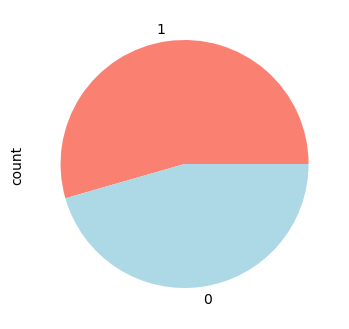

In [7]:
df['target'].value_counts().plot(colors=['salmon', 'lightblue'], kind='pie', figsize=(4,5));

In [8]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


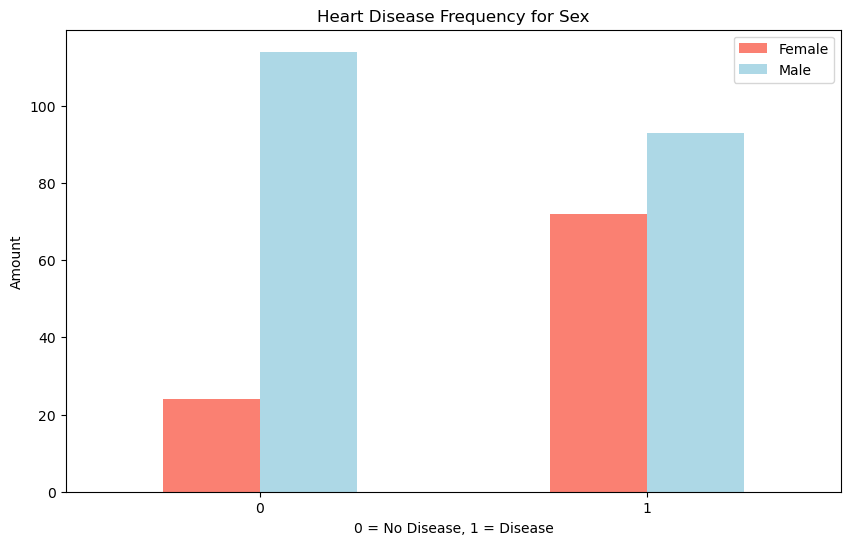

In [11]:
# Plotting the Crosstab: 

pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

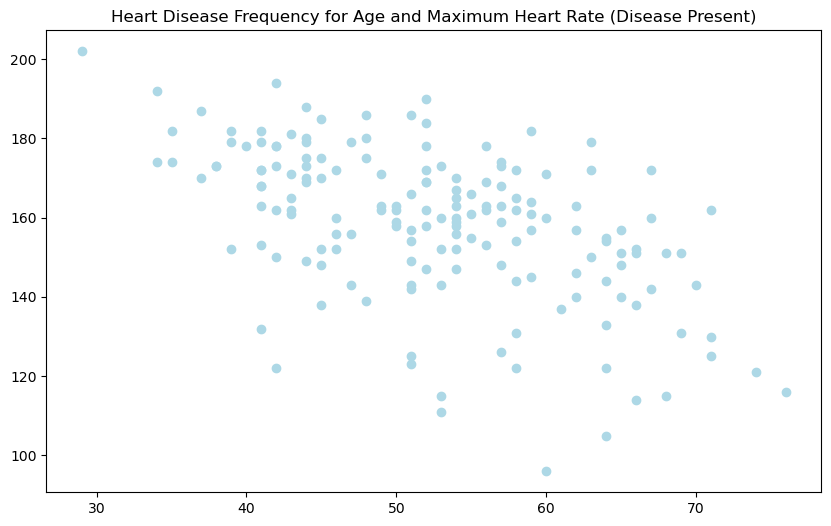

In [12]:
# Create another figure: 

fig, ax = plt.subplots(figsize=(10,6))

# Scatter with positive examples: 
ax.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c='lightblue');

ax.set_title("Heart Disease Frequency for Age and Maximum Heart Rate (Disease Present)");

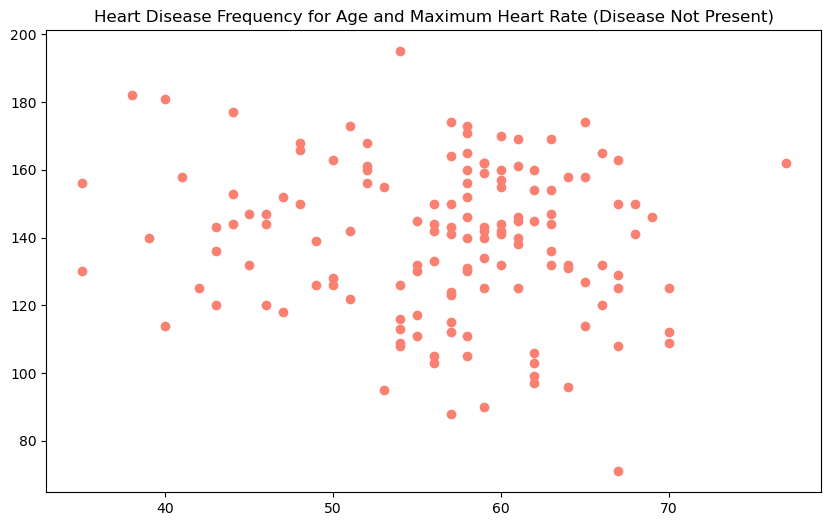

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

# Scatter with negative examples: 
ax.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c='salmon');

ax.set_title("Heart Disease Frequency for Age and Maximum Heart Rate (Disease Not Present)");

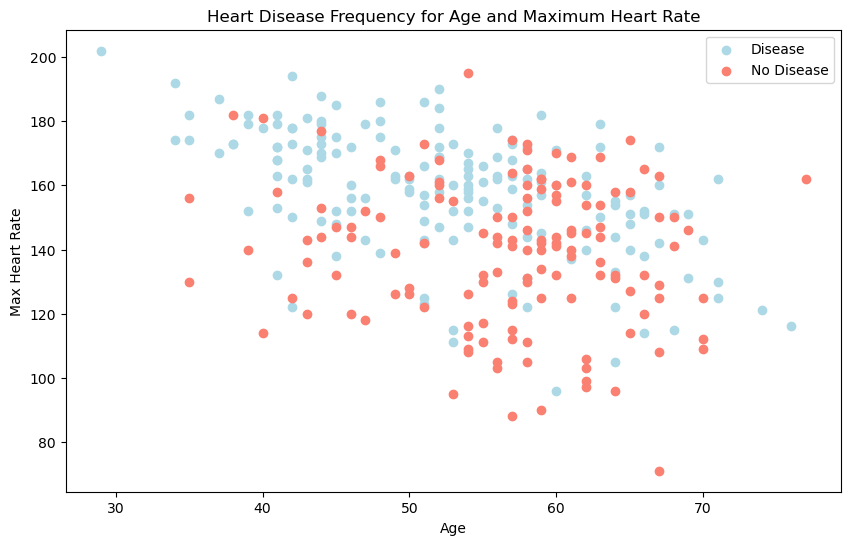

In [14]:
# Scatter for Both: 

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c='lightblue');
ax.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c='salmon');

ax.set_title("Heart Disease Frequency for Age and Maximum Heart Rate");

# Add some helpful info: 
ax.set_xlabel("Age")
ax.set_ylabel("Max Heart Rate")
ax.legend(['Disease', 'No Disease'])

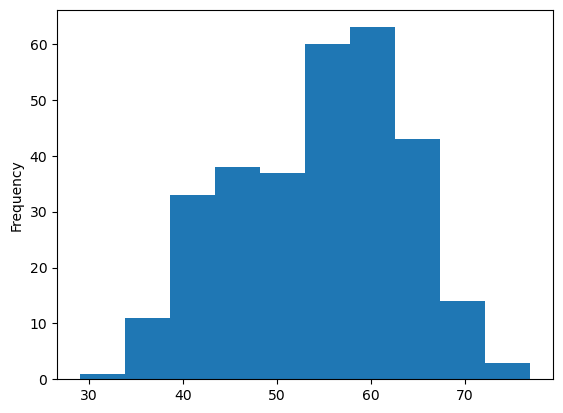

In [15]:
# Check the distribution of the age column with a histogram.

df.age.plot.hist(bins=10);

### Heart Disease Frequency per Chest Pain Type:

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


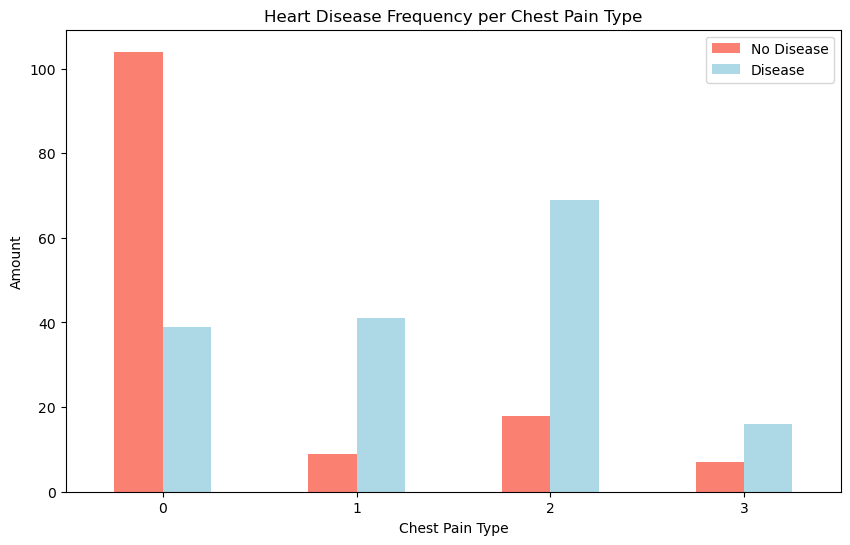

In [17]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Make a Correlation Matrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


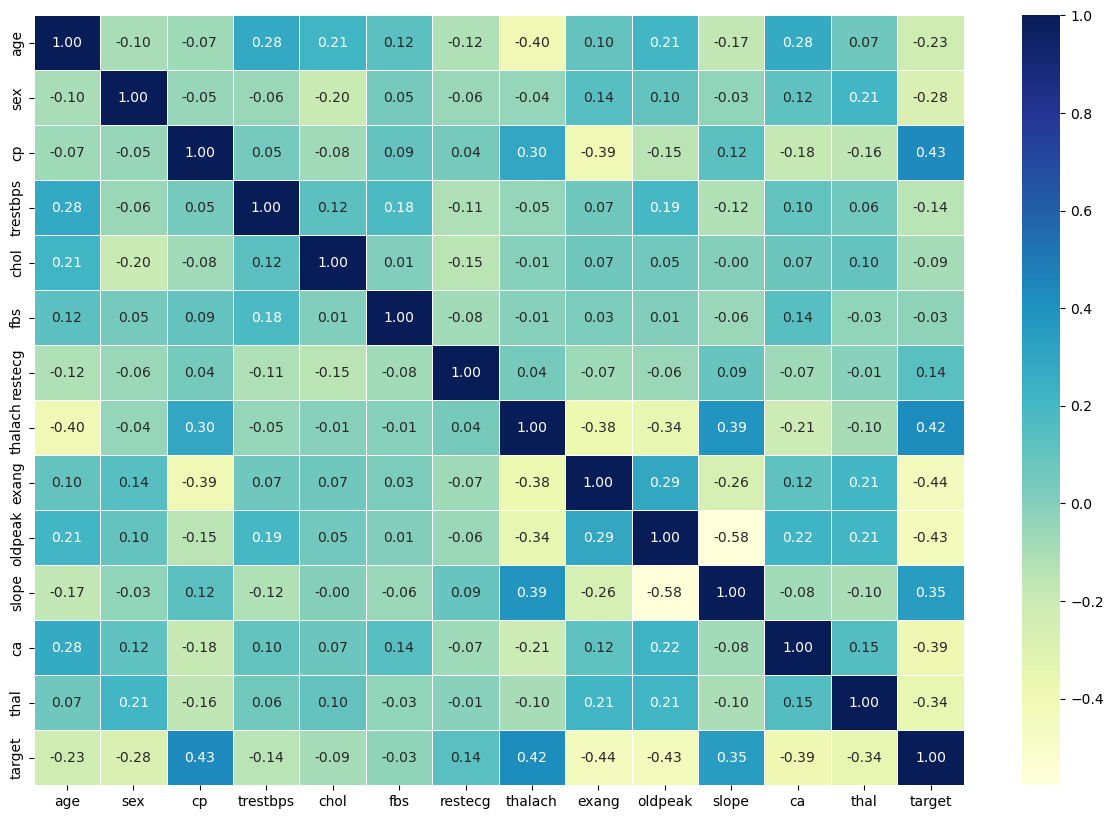

In [19]:
# Let's make our correlation matrix a little prettier.

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=0.5,cmap="YlGnBu")

## 5. Modelling

In [20]:
# Split data into X and Y

X = df.drop('target', axis=1)
y = df["target"]

In [21]:
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

1. Find patterns on training set.
2. Test it using patterns on the test set.

Let's try 5 Models: 
- LogisticRegression
- RandomForestClassifier
- KNeighborsClassifier
- SVC
- LinearSVC

<img src="https://scikit-learn.org/1.3/_static/ml_map.png" style="border: solid 1px red;">

In [33]:
# Put Models into a dictionary: 

models = {"Logistic Regression" : LogisticRegression(max_iter=100),
          "KNeighborsClassifier" : KNeighborsClassifier(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "SVC" : SVC(),
          "LinearSVC": LinearSVC() }

def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given ML models.
        models: a dict of different Scikit-Learn ML models.
        X_train: training data (no labels)
        X_test: testing data (no labels)
        y_train: training labels
        y_test: testing labels.
    """
    # Set Random Seed
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # Loop through models
    for name, model in models.items(): 
        # Fit the model into data.
        model.fit(X_train, y_train)
        # Evaluate the model and apepnd its score to model_scores.
        model_scores[name] = model.score(X_test, y_test).round(2) * 100
    return model_scores

In [34]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

C:\.env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\.env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\.env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 89.0,
 'KNeighborsClassifier': 69.0,
 'RandomForestClassifier': 84.0,
 'SVC': 70.0,
 'LinearSVC': 49.0}

# Model Comparison

<Axes: >

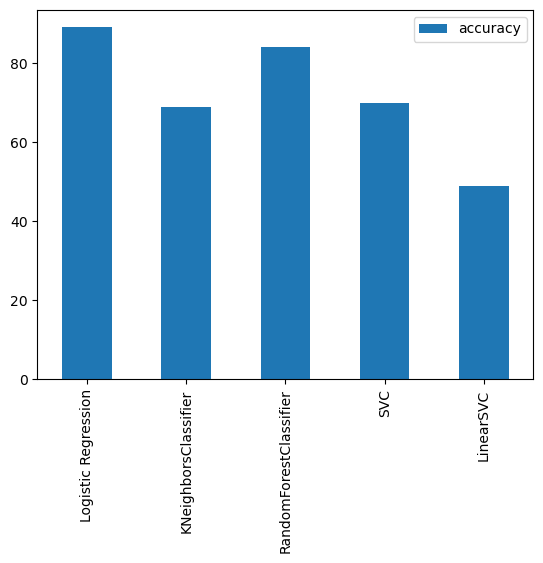

In [39]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

## Classification & Regression Metrics: 

- Accuracy = R<sup>2</sup>
- Precision: MAE (Mean Absolute Error) 
- Recall: MSE (Mean Squared Error)
- F1: RMSE (Root Mean Squared Error)
- Support: Number of samples each metral was calculated on.
- **Macro Avg:** Average precision, recall, and F1 between classes.
- **Weighted Avg:** Precision, Recall, and F1 score between classes. Favours the majority class (e.g. will give a high value when one class outperforms another due to having more samples.)

<h4> Let's look at the following: </h4>

- Hyperparameter Tuning
- Feature Importance
- Cross Validation
- Precision
- Recall
- F1 Score
- Classification Report
- ROC Curve
- Area under the Curve (AUC) 

Goldilocks: Performs well on our dataset, but also performs well on unseen models.

### Hyperparameter Tuning

Example: How to tune a KNeighborsClassifier Model: 

In [44]:
# Let's tune KNN: 

train_scores = []
test_scores = []

# Create a list of different values of n_neighbors: 
"""
n_neighbors: Number of neighbors to use by default for kneighbors queries.
"""
neighbors = range(1,21) 

# Setup KNN instance: 
knn = KNeighborsClassifier()

# Loop through different n_neighbors: 
for i in neighbors: 
    knn.set_params(n_neighbors=i)

    #Fit the algorithm: 
    knn.fit(X_train, y_train)

    #Update the training scores list: 
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [45]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [46]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


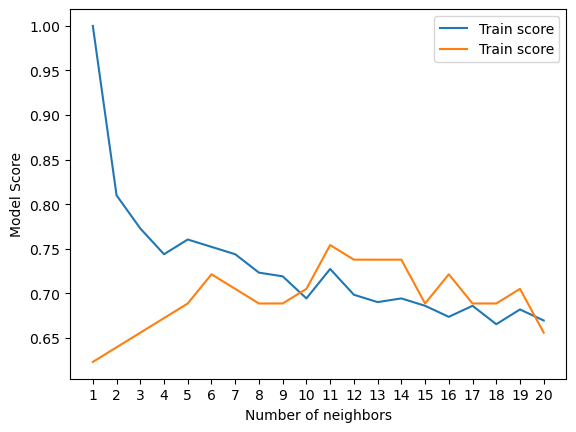

In [55]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Train score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune: 
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearch cross-validation.

In [63]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

# Create Hyperparameter grid for RandomForestClassifier: 
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2), 
            "min_samples_leaf" : np.arange(1,20,2)}

Now we've got hyperparamater grids setup for each of our models, let's tune them using RandomizedSearchCV. 

In [64]:
# Tune Logistic Regression Model:

np.random.seed(42)

# Setup random hyperparameters search for LogisticRegression: 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid, 
                                cv=5, 
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression: 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [65]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [66]:
rs_log_reg.score(X_test, y_test) 

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier().

In [67]:
# Setup Random Seed
np.random.seed(42) 

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fit random hyperparameter search model for RandomForestClassifer: 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
# Find the best hyperparameters

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [69]:
rs_rf.score(X_test, y_test) 

0.8688524590163934

## Hyperparameter Tuning With GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [70]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression: 
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [71]:
# Check the best hyperparameters: 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test) 

0.8852459016393442

## Considerations & Course Changes

In [74]:
# Plotting a Confusion Matrix
import seaborn as sns 
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds): 
    """
    Plots a confusion matrix using Seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

In [75]:
## Plot ROC Curve: sklearn 1.2 changed 'plot_roc_curve' to RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

## Evaluating our tuned machine learning classifier, beyond accuracy:

* ROC Curve and AUC Score
* Confusion Matrix
* Precision
* Recall
* F1 Score

And it would be great if cross-validation was used where possible!

To make comparisons and evaluate our trained models, first we need to make predictions.

In [76]:
# Make predictions with tuned model:

y_preds = gs_log_reg.predict(X_test)

In [77]:
len(y_preds) 

61

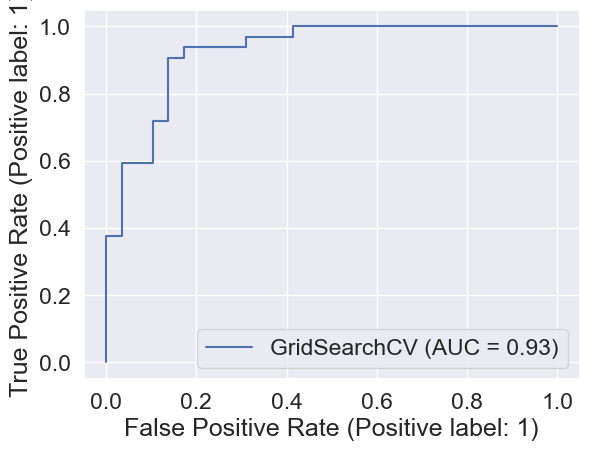

In [79]:
# Import ROC curve function from the sklearn.metrics function

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test) 

plt.show()

In [80]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


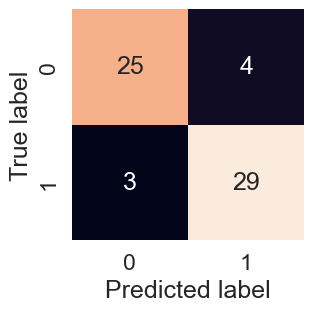

In [83]:
plot_conf_mat(y_test, y_preds) 

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classifcaiton reprot as well as a cross-validated precision, recall, and f1-score. 

In [84]:
print(classification_report(y_test,y_preds)) 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics using Cross-Validation

We're going to calculate accuracy, precision, recall, and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [96]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [103]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)

In [105]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)

In [106]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)

In [107]:
# Cross-validated F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)

In [108]:
cv_accuracy, cv_precision, cv_recall, cv_f1

(0.8446994535519124,
 0.8207936507936507,
 0.9212121212121213,
 0.8673007976269721)

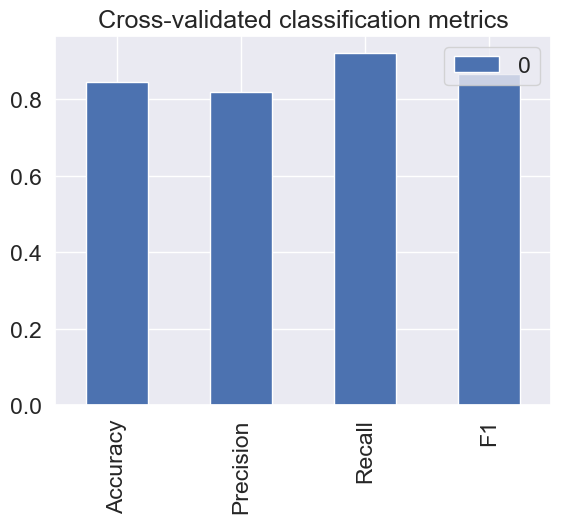

In [110]:
# Visualize our cross-validated metrics: 
cv_metrics = pd.DataFrame({"Accuracy" : cv_accuracy, 
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1}, index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics');

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance of our LogisticRegression model...

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_ 



{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [116]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear') 
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [117]:
# Check coef_

clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [120]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

"""
What we've done here is mapped each column to the correlation variable. Essentially, 
these values predict to what extent the column predicts the target value. 
"""

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<Axes: title={'center': 'Feature Importance'}>

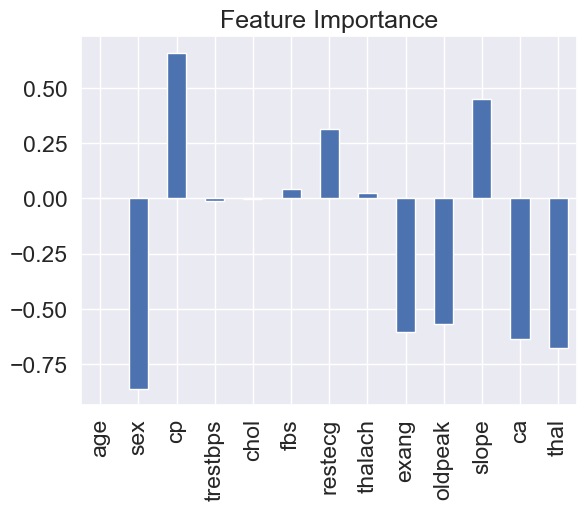

In [121]:
# Visualize feature importance: 
feature_df = pd.DataFrame(feature_dict, index=[0]) 
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [122]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [123]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data to enrich the dataset?
* Could you try a better model For example, CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far?)
* If your model is good enough (you have hit your evaluation metric), how would you export it and share it with others?